In [1]:
import pydotplus
from sklearn import tree
import collections
%matplotlib inline

In [2]:
# Data Collection
X = [ [180, 15,0],     
      [177, 42,0],
      [136, 35,1],
      [174, 65,0],
      [141, 28,1]]

In [3]:
Y = ['man', 'woman', 'woman', 'man', 'woman']    

data_feature_names = [ 'height', 'hair length', 'voice pitch' ]

In [9]:
# Training
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,Y)

In [10]:
# Visualize data
dot_data = tree.export_graphviz(clf,
                                feature_names=data_feature_names,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree.png')

True

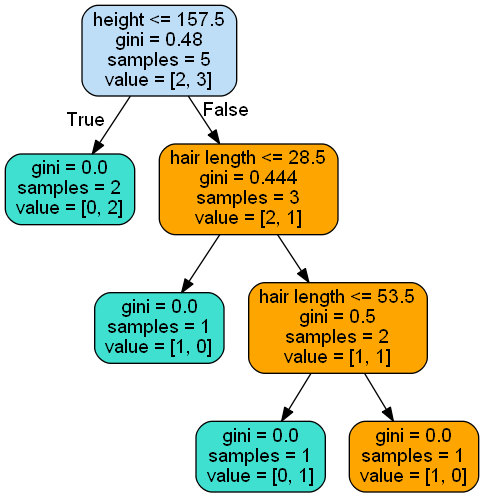

In [11]:
from IPython.display import Image, display
display(Image(filename='tree.png'))